In [1]:
from neuronav.envs.grid_env import GridEnv, GridSize
from neuronav.envs.graph_env import GraphEnv
from neuronav.agents.td_agents import TDSR, TDQ
from neuronav.agents.dyna_agents import DynaQ, DynaSR
from neuronav.agents.mb_agents import MBV
from neuronav.envs.grid_templates import GridTemplate
from neuronav.envs.graph_templates import GraphTemplate
from neuronav.utils import run_episode, softmax, plot_values_and_policy
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

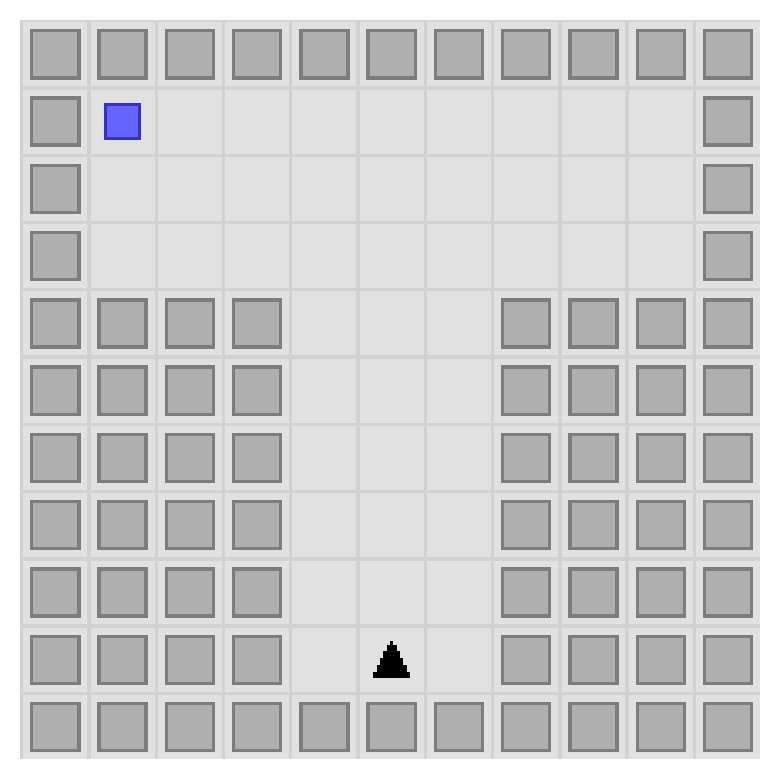

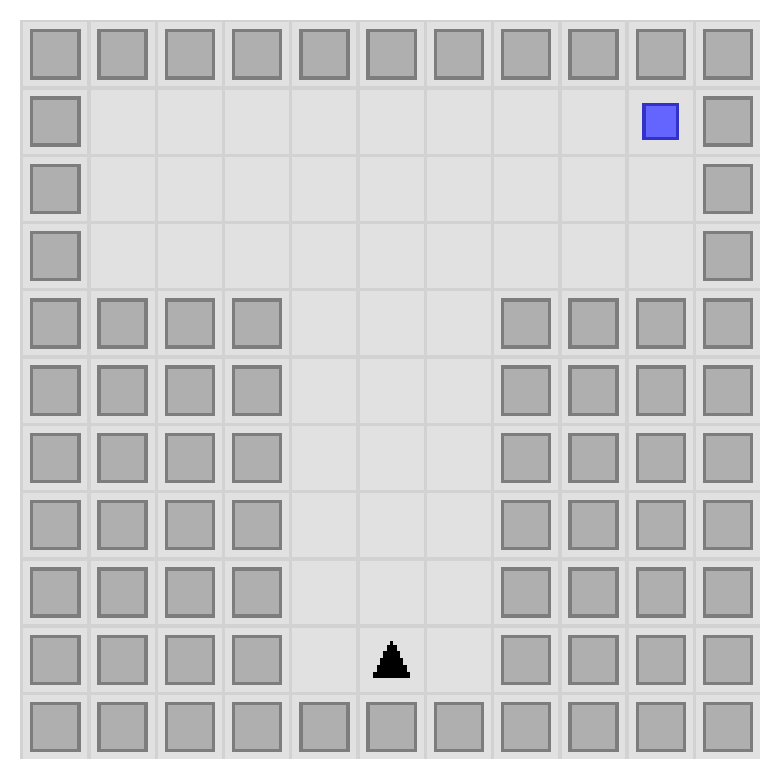

In [2]:
env = GridEnv(template=GridTemplate.t_maze)
obs = env.reset()
env.render()
obs = env.reset(objects={"rewards": {(1, 9): 1}})
env.render()

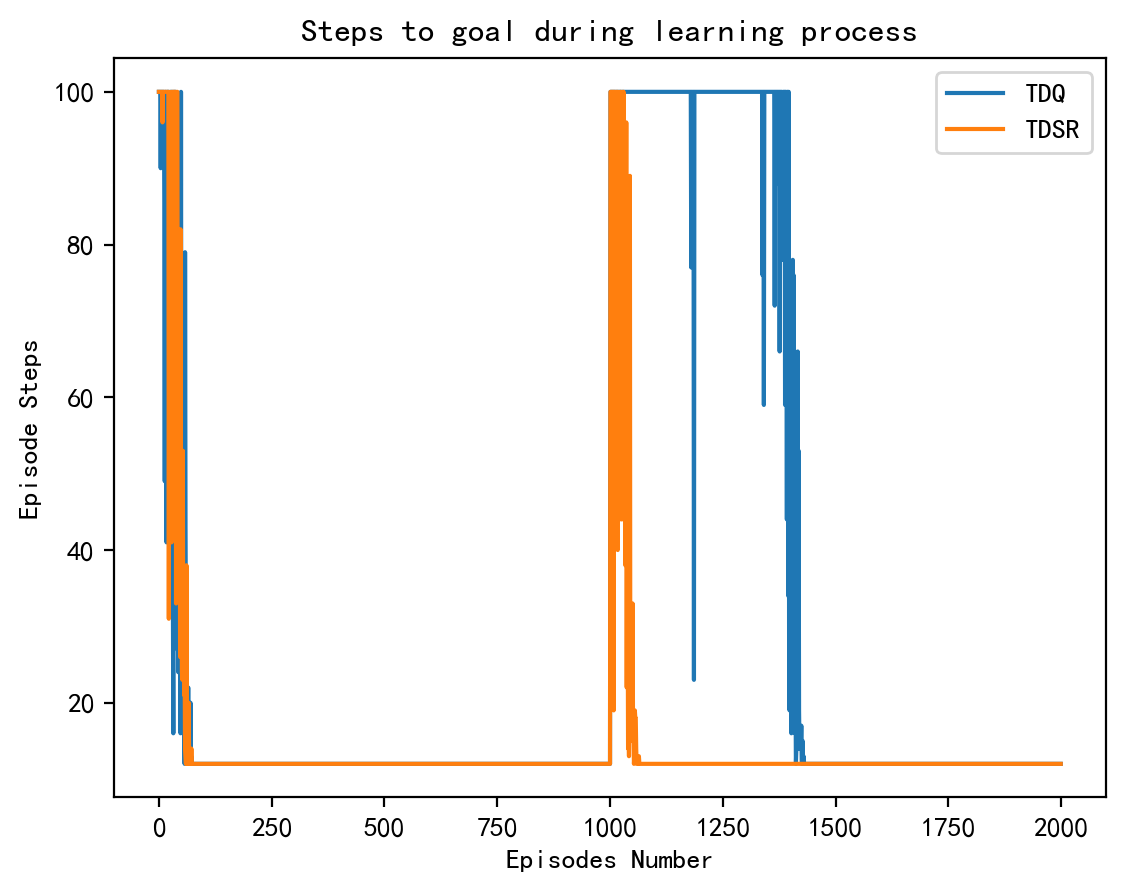

In [3]:
num_episodes = 2000
switch_episode = 1000
num_steps = 100
goal_loc_a = {(1, 1): 1}
goal_loc_b = {(1, 9): 1}
goal_locs = [goal_loc_a, goal_loc_b]

agent_q = TDQ(env.state_size, env.action_space.n)
agent_sr = TDSR(env.state_size, env.action_space.n)

agents = {"TDQ": agent_q, "TDSR": agent_sr}

for agent_name in agents:
    reward_locs = goal_loc_a
    steps = []
    for i in range(num_episodes):
        if i > switch_episode:
            reward_locs = goal_loc_b
        agents[agent_name], step, _ = run_episode(
            env, agents[agent_name], num_steps, objects={"rewards": reward_locs}
        )
        steps.append(step)
    plt.plot(steps, label=agent_name)
plt.legend()
_ = plt.title("Steps to goal during learning process")
_ = plt.ylabel("Episode Steps")
_ = plt.xlabel("Episodes Number")
plt.gcf().set_dpi(100)
plt.show()